Some Resources I have actully found useful - 

 - [A Step-by-Step Backpropagation Example - Matt Mazur](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
 - [A Gentle Introduction to Neural Networks for Machine Learning](https://www.codementor.io/james_aka_yale/a-gentle-introduction-to-neural-networks-for-machine-learning-hkijvz7lp) - This link provides brief overview of various types of NN such as CNN, RNN and GAN.

---

We have that - 

z = $w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$

Where z is calculated for a given sample. 

Now let us define a activation function such that -  

$$ \phi(z) = 
\begin{pmatrix}
1 & if z \geq \theta \\
-1 & otherwise
\end{pmatrix}
\quad
$$

For simplicity, we can rewrite above equation by bring $\theta$ to left hand side and define a weight-zero as -$\theta$ and $x_0$ as 1. We get - 

$$z = w_0x_0+w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$$ 

and 

$$ \phi(z) = 
\begin{pmatrix}
1 & if z \geq 0 \\
-1 & otherwise
\end{pmatrix}
\quad
$$

Here, **$\phi(z)$** is our activation function. 

The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn't. Thus, Rosenblatt's initial perceptron rule is fairly
simple and can be summarized by the following steps:
1. Initialize the weights to 0 or small random numbers.
2. For each training sample $x(i)$ perform the following steps:
  1. Compute the output value $y^ˆ$ .
  2. Update the weights.
Here, the output value is the class label.

See this illustration of perceptron (shown below) where $\phi(z) = z$. 

![](images/perceptron.png)

It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small. If the two classes can't be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset (epochs) and/or a threshold for the number of tolerated misclassifications—the perceptron would never stop updating the weights otherwise.

#### Online and Error Driven Algorithm

First, it is online. This means that instead of considering the entire data set at the same time, it only ever looks at one example. It processes that example and then goes on to the next one. Second, it is error driven. This means that, so long as it is doing well, it doesn’t bother updating its parameters.

#### Perceptron vs Sigmoid Neuron

In perceptron, output values can either be 0 or 1. However, in case of sigmoid neuron, input/output can take any value in the range [0,1]. 

Also, perceptron curve is essentially a step function. On the other hand, sigmoid function follows S-shaped function with some midway threshold value (usually .5). 

#### Simple NN and Backpropagation 

Let us consider a NN with 2 input neurons (i1 and i2), one hidden layer with 2 neurons (h1 and h2) and 2 output neurons (o1 and o2). 

Let input be `[.05, .10]` and desired2 output be `[.01, .99]`. Bias for hidden layer (b1) = `[.35]` and for output layer (b2) = `[.60]`

Weights are as follows = 
```
[w1, w2, w3, w4] = [.15, .20, .25, .30] #for first layer
[w5, w6, w7, w8] = [.40, .45, .50, .55] #for second layer
```

For this NN, we'll use logistic function $f(x) = \frac{1}{1 + exp(-x)}$ as our activation function.

Scipy packages has a function for caclucating the value for logistic function - 

```
from scipy.special import expit
expit(.3924999999) # output - 0.59688437823570573
```

In [82]:
import numpy as np
from scipy.special import expit

i1, i2 = [.05, .1]
target1 = .01
target2 = .99

lr = .5

w1,w2,w3,w4 = [.15, .20, .25, .30]
w5, w6, w7, w8 = [.40, .45, .50, .55]

b1 = .35
b2 = .60

def nn():

ih1 = np.dot([i1,i2],[w1,w2])+ b1  #input for the first hidden layer neuron
ih2 = np.dot([i1,i2],[w3,w4]) + b1  #input for the second hidden layer neuron

oh1 = expit(ih1)     #applying activation function to get the o/p of firt hidden layer neuron
oh2 = expit(ih2)     #applying activation function to get

#oh1, oh2  these will be used as input for output neurons

io1 = np.dot([oh1, oh2], [w5, w6]) + b2
io2 = np.dot([oh1, oh2], [ w7, w8]) + b2 

out1 = expit(io1)
out2 = expit(io2)



0.751365069552 0.772928465321


Now we caclucate the error using following formula - 

$E_{total} = E_1 + E_2 =  \Sigma\frac{1}{2}(Target - output)^2$

In [62]:
error_total = .5 *( (target1 - out1)**2 + (target2 - out2)**2)
error_total

0.29837110876000272

##### The Backwards Pass

Our goal with backpropagation is to update each of the weights in the network so that they cause the actual output to be closer the target output, thereby minimizing the error for each output neuron and the network as a whole.

The only values we can update in order to minimize the error are the weights and biases.

For this we calculate $\frac{\partial E_{total}}{\partial w}$ which tells us how much change in `w` affects $E_{total}$. We do this for each weight

We have seen above that $E_{total}$ *directly* depends on `out1` and `out2` which in turn depend on `io1` and `i02` which in turn depend on weights `w5`,`w6`, `w7`, `w8`. This means we have to use chain rule like below - 

$\frac{\partial E_{total}}{\partial {w_5}}$ = $\frac{\partial E_{total}}{\partial out1}*\frac{\partial out1}{\partial io1} * \frac{\partial io1}{\partial {w_5}} $

Now 
$$\frac{\partial E_{total}}{\partial {out1}} = 2* \frac{1}{2}(target1 - out1)^{2-1}*(-1) + 0 = out1 - target1$$

Now we have to calculate $\frac{\partial out1}{\partial io1}$. Here `out1` was actually a logistic function (our activation function) $f(x) = \frac{1}{1 + exp(-x)}$ . The derivative of logistic function is - 

If 

$y = \frac{1}{1 + exp(-x)}$ 

then 

$\frac{\partial y}{\partial x} = y(1 - y)$

This gives

$$\frac{\partial out1}{\partial {io1}} = out1(1 - out1)$$

Finally, we calculate $\frac{\partial io1}{\partial w5}$. We know that - $io1 = w5*oh1 +w6*oh2 + b2$

Using above, we get - 

$$\frac{\partial io1}{\partial w5} = oh1 $$

Following the same method implemented above, we can calcule the gradient wrt w6, w7 and w8. 

---
Now, we also calculate the gradient wrt w1, w2,w3 and w4

$\frac{\partial E_{total}}{\partial {w_1}}$ = $\frac{\partial E_{total}}{\partial oh_1}*\frac{\partial oh_1}{\partial ih_1} * \frac{\partial ih_1}{\partial {w_1}}$

Note that unlike earlier, the first derivative on LHS is wrt `oh1` rather than `out1`. Here, both `out1` and `out2` *depend* on `w1` (via `oh1`). So basically $E_{total}$ depends on `oh1` and `oh1` in turn depends on `w1`. This explains the difference between calculations of $\frac{\partial E_{total}}{\partial w_7}$ and $\frac{\partial E_{total}}{\partial w_1}$  

$\frac{\partial E_{total}}{\partial oh_1} = \frac{\partial E1}{\partial oh_1} +\frac{\partial E2}{\partial oh_1} $

$\frac{\partial E1}{\partial oh_1} = .5*2*(target1-out1)*(-1)*\frac{\partial out1}{\partial oh_1}$

$= (-1)*(target1-out1)*\frac{\partial out1}{\partial io_1}*\frac{\partial io_1}{\partial oh_1}$

$= (-1)*(target1-out1)*out1*(1-out1)*\frac{\partial io_1}{\partial oh_1}$

$ = (-1)*(target1-out1)*out1*(1-out1)*w_5$

Now, to calculate $\frac{\partial E2}{\partial oh_1}$

$\frac{\partial E2}{\partial oh_1} = .5*2*(target2-out2)*(-1)*\frac{\partial out2}{\partial oh_1}$

$= (-1)*(target2-out2)*\frac{\partial out2}{\partial io_2}*\frac{\partial io_2}{\partial oh_1}$

$= (-1)*(target2-out2)*out2(1-out2)*\frac{\partial io_2}{\partial oh_1}$

$= (-1)*(target2-out2)*out2(1-out2)*w_7$

In [63]:
dw5 = (out1 - target1)*(out1*(1-out1))* oh1 #gradient wrt 5

In [64]:
#using learning rate = .5, w5 is updated as below
w5_new = w5 - (lr*dw5)
w5_new

0.35891647971788465

In [66]:
dw6 = (out1 - target1)*(out1*(1-out1))* oh2 #derivative of error wrt w6

In [67]:
w6_new = w6 - (lr*dw6)
w6_new

0.4086661860762334

In [68]:
dw7 = (out2-target2)*(out2*(1-out2))*oh1 #derivative of error wrt w7
w7_new = w7 - (lr*dw7)
w7_new

0.5113012702387375

In [69]:
dw8 = (out2-target2)*(out2*(1-out2))*oh2 #derivative of error wrt w8
w8_new = w8 - (lr*dw8)
w8_new

0.56137012110798912

In [41]:
e1 =(-1)*(target1 - out1)*(out1*(1-out1))*.4 # de1/doh1

In [42]:
e2= (-1)*(target2-out2)*(out2*(1-out2))*.5  #de2/doh1

In [50]:
dw1 = (e1+e2)*(oh1*(1-oh1)*.05) #derivative of error wrt w1
dw1

0.0004385677344743468

In [70]:
w1_new = w1 -(lr*dw1)
w1_new

0.14978071613276281

In [72]:
dw2 = (e1+e2)*(oh1*(1-oh1)*.1) #derivative of error wrt w1
w2_new = w2 - (lr*dw2)
w2_new

0.19956143226552567

In [75]:
x1 = .5*2*(-1)*(target1-out1)*out1*(1-out1)*w6

x2 = .5*2*(-1)*(target2-out2)*out2*(1-out2)*w8
dw3 = (x1+x2)*(oh2*(1-oh2))*i1
dw3

0.00049771273526085988

In [76]:
w3_neww = w3 - (lr*dw3)
w3_neww

0.24975114363236958

In [79]:
x1 = .5*2*(-1)*(target1-out1)*out1*(1-out1)*w6
x2 = .5*2*(-1)*(target2-out2)*out2*(1-out2)*w8
dw4 = (x1+x2)*(oh2*(1-oh2))*i2
dw4

0.00099542547052171976

In [80]:
w4 - (lr*dw4)

0.29950228726473915

Let us put it all together. 

In [109]:
import numpy as np
from scipy.special import expit


def nn(niter):
    i1, i2 = [.05, .1]
    target1, target2 = [.01, .99]
    lr = .5
    b1, b2 = [.35, .60]
    w1,w2,w3,w4 = [.15, .20, .25, .30]
    w5, w6, w7, w8 = [.40, .45, .50, .55]
    
    n = 0
    while n <= niter:
        ih1 = np.dot([i1,i2],[w1,w2])+ b1  #input for the first hidden layer neuron
        ih2 = np.dot([i1,i2],[w3,w4]) + b1  #input for the second hidden layer neuron

        oh1 = expit(ih1)     #applying activation function to get the o/p of firt hidden layer neuron
        oh2 = expit(ih2)     #applying activation function to get

#oh1, oh2 will be used as input for output neurons

        io1 = np.dot([oh1, oh2], [w5, w6]) + b2
        io2 = np.dot([oh1, oh2], [ w7, w8]) + b2 

        out1 = expit(io1)
        out2 = expit(io2)

        dw5 = (out1 - target1)*(out1*(1-out1))* oh1
        dw6 = (out1 - target1)*(out1*(1-out1))* oh2
        dw7 = (out2-target2)*(out2*(1-out2))*oh1
        dw8 = (out2-target2)*(out2*(1-out2))*oh2

        e1 =(-1)*(target1 - out1)*(out1*(1-out1))*w5
        e2= (-1)*(target2-out2)*(out2*(1-out2))*w7
        dw1 = (e1+e2)*(oh1*(1-oh1)*i1)
        dw2 = (e1+e2)*(oh1*(1-oh1)*i2)
        x1 = .5*2*(-1)*(target1-out1)*out1*(1-out1)*w6
        x2 = .5*2*(-1)*(target2-out2)*out2*(1-out2)*w8
        dw3 = (x1+x2)*(oh2*(1-oh2))*i1
        dw4 = (x1+x2)*(oh2*(1-oh2))*i2

        w1 = w1 - (lr*dw1)
        w2 = w2 - (lr*dw2)
        w3 = w3 - (lr*dw3)
        w4 = w4 - (lr*dw4)
        w5 = w5 - (lr*dw5)
        w6 = w6 - (lr*dw6)
        w7 = w7 - (lr*dw7)
        w8 = w8 - (lr*dw8)
        n=n+1

    print(out1, out2)

In [122]:
nn(60000)

0.0104039415528 0.989583606458


#### Scikit-Learn MLP Classifier

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

nn = MLPClassifier(solver='lbfgs')
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

Note that `activation` keyword can take one of following values - (relu, tanh, identity, logistic). This is the activation function for hidden layers. 

  - `identity`, no-op activation, useful to implement linear bottleneck, returns $f(x) = x$
  - `logistic`, the logistic sigmoid function, returns $f(x) = \frac{1}{1 + exp(-x)}$.
  - `tanh`, the hyperbolic tan function, returns $f(x) = tanh(x)$.
  - `relu`, the rectified linear unit function, returns $f(x) = max(0, x)$

Also, `solver` keyword can take one of these values - (`lbfgs`, `sgd`, `adam`). Default is `adam`

In [1]:
>>> from sklearn.datasets import fetch_mldata
>>> mnist = fetch_mldata('MNIST original')

#second command raised OSError few times. It was because internet speed was erratic and downloaded data got corrupted.

In [2]:
mnist.data.shape, mnist.keys(), mnist.COL_NAMES

((70000, 784),
 dict_keys(['DESCR', 'COL_NAMES', 'target', 'data']),
 ['label', 'data'])

In [2]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data, mnist.target)

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MLPClassifier(hidden_layer_sizes=(150,))
model.fit(xtrain, ytrain)
ypredict = model.predict(xtest)

Above we set the value of `hidden_layer_sizes` to (150,). The default value is (100,). Increasing this value has improved the results by about 2% (from .945 to .965).  

In [40]:
accuracy_score(ytest, ypredict)

0.96502857142857146

In [41]:
model.score(xtest, ytest)


0.96502857142857146

In [42]:
mat = confusion_matrix(ytest,ypredict)

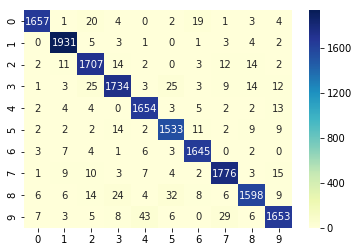

In [43]:
import seaborn as sns
sns.heatmap(mat, annot = True, fmt='d', cbar = True, cmap = 'YlGnBu')

In [44]:
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [45]:
print(classification_report(ytest,ypredict))

             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98      1711
        1.0       0.98      0.99      0.98      1950
        2.0       0.95      0.97      0.96      1767
        3.0       0.96      0.95      0.95      1829
        4.0       0.96      0.98      0.97      1689
        5.0       0.95      0.97      0.96      1586
        6.0       0.97      0.98      0.98      1671
        7.0       0.97      0.97      0.97      1830
        8.0       0.97      0.94      0.95      1707
        9.0       0.96      0.94      0.95      1760

avg / total       0.97      0.97      0.96     17500



In above report, sample column shows the number of respective labels in ytest. This means, `ytest` has 1711 samples for class '0' and 1950 samples for class '1'.


Let us test the GaussianNB classifier for the same data -

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
ypred = gnb.predict(xtest)

In [47]:
gnb.score(xtest, ytest)

0.56662857142857148

In [48]:
accuracy_score(ytest, ypred)

0.56662857142857148

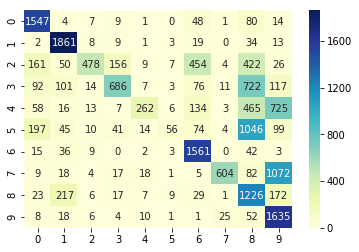

In [49]:
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat, annot = True, fmt='d', cbar = True, cmap = 'YlGnBu')

We see that the performance of GaussianNB is far more worse. In fact, our MLPClassifier actually performed very well even with the default hyperparameters values and we were able to improve the result by increasing the number of neurons in hidden layers. 

#### Using `cross_val_score` on training data

In [51]:

from sklearn.model_selection import cross_val_score
model = MLPClassifier(hidden_layer_sizes=(150,))
cross_val_score(model, xtrain, ytrain, cv = 5)

array([ 0.96277609,  0.94916222,  0.95495238,  0.95922256,  0.95636433])

In [53]:
import numpy as np
a = np.array([0.96277609,  0.94916222,  0.95495238,  0.95922256,  0.95636433])
a

array([ 0.96277609,  0.94916222,  0.95495238,  0.95922256,  0.95636433])

In [54]:
a.mean()

0.95649551600000005

In [55]:
model.hidden_layer_sizes


(150,)

In [141]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, centers = 2, cluster_std = .5)

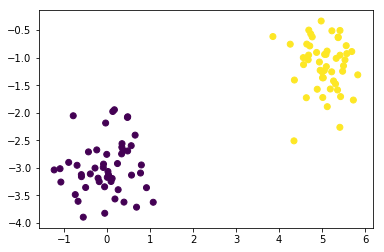

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y)

In [151]:
i1, i2 =X[99]
y[99]

1

In [ ]:
import numpy as np
from scipy.special import expit

iter = 10000
for i in range(100):
    i1, i2 = X[i]
    target = y[i]
    lr = .5
    b1, b2 = [.35, .60]
    w1,w2,w3,w4 = [.15, .20, .25, .30]
    w5, w6 = [.40, .45]
    
    while n <= iter:
    ih1 = np.dot([i1,i2],[w1,w2])+ b1  #input for the first hidden layer neuron
    ih2 = np.dot([i1,i2],[w3,w4]) + b1  #input for the second hidden layer neuron

    oh1 = expit(ih1)     #applying activation function to get the o/p of firt hidden layer neuron
    oh2 = expit(ih2)     #applying activation function to get

#oh1, oh2 will be used as input for output neurons

    io = np.dot([oh1, oh2], [w5, w6]) + b2 

    out = expit(io)
    error = .5*(target - output)**2

        dw5 = (out - target)*(out*(1-out))* oh1
        dw6 = (out - target)*(out*(1-out))* oh2

        e =(-1)*(target - out)*(out*(1-out))*w5
        dw1 = (e)*(oh1*(1-oh1)*i1)
        dw2 = (e)*(oh1*(1-oh1)*i2)
        x1 = .5*2*(-1)*(target-out)*out*(1-out)*w6
        dw3 = (x)*(oh2*(1-oh2))*i1
        dw4 = (x)*(oh2*(1-oh2))*i2

        w1 = w1 - (lr*dw1)
        w2 = w2 - (lr*dw2)
        w3 = w3 - (lr*dw3)
        w4 = w4 - (lr*dw4)
        w5 = w5 - (lr*dw5)
        w6 = w6 - (lr*dw6)
        
        n=n+1

    print(out1, out2)